

# Project: Investigate a Dataset - [No Show Appointments]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row, we will drop a brief about each column's significance, but more details are offered on the website [here](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True). 

The columns are as follows:

    • PatientID : icluding the ID for each patient
    • AppointmentID: the ID of the appointment
    • ScheduledDay: the day when the patient made the reservation
    • AppointmentDay: the day of the appointment at the clinic
    • Age: patient age
    • Neighbourhood: the area including the hospital
    • Hipertension,Diabetes,Alcoholism: binary columns(1=Yes, 0=No)      indicating if the patient suffers these diseases
    • Handcap: on a scale from 0 to 4, it indicates the degree of handcap of the patient
    • Scholarship: a binary column telling whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    • sms_received: binary column indicating whether or not a message was received 
    • no-show: binary column indicating whether or not the patient DID NOT attend their appointment




### Worth a note: many modifications on columns names and content are to be done based on the project need, each specified before execution ..  



### Question(s) for Analysis:

Here, we should have ideally specified two or three variables to study their effect on patients not attending their appointments, however, as long as we have the sufficient amount of data, we will analyze as much columns as possible, in order to know exactly, what are the factors affecting the most the "no-show" incidents that happened and how can we work on them, which is actually the purpose of our research. 
Therefore, our research questions will be practically two main questions repeated for each aspect that we study, these aspects are explained clearly below before defining each of our two primary functions in the research.



In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In this investigation, we will have two procedures, repeating both of them for each aspect (df column) of our dataset. The first procedure in the function below is based on data from patients who did not attend their appointments(no_show), we study the most common charactaristic among people who missed their appointments for each aspect(df column). 
Example: among people who missed their appointments, what is the more dominant gender. (Here the aspect column being : 'gender') 

We discover the dominant aspect, in addition to counts of all aspects through printing the count of each aspects of respective column, in addition to plotting all the data in bar plot to visualize data.

In [2]:
def first_procedure (df, col, x_labels, title, y_label="Counts"):
    
    '''
    df: the original cleaned dataframe
    col: the col of interest for analyzing the dominant feature among it for no_show appointments for this function call
    x_labels: labels of the bars on the x-axis
    title: the plot title
    y_label: y-axix label
    '''
    df_noshow = df.query('Attendance == "0"')
    print("The distribution of {} of people with no show is as follows: \n".format(col))
    
    print(df_noshow[col].value_counts()) 
    #lets plot
    heights = df_noshow[col].value_counts()
    print("And here is the visualization of these results : \n")
    plt.bar(x_labels, heights, color ='black')
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(col.title());

    


For this procedure, we do it the other way round, that is for each aspect(column), we group it into all groups of all its possible charactaristics (Example: Females and Males for 'gender' column), then study for each group, what is the more dominant behvaviour, attending or not attending, by calculating the mean of 'Attendance' column value for each group, knowing that after editing the dataset, we have the column 'Attendance' with 1 for show and 0 for no show, therefore, the group with the lowest mean for 'Attendance' is the most probable group not to show up, that we should deal seriously with to prevent these 'no-shows' from happening. Also, the mean (scaled by 100) for each group is plotted in a bar plot to visualize which is the group with least mean easily.

In [3]:
#second_procedure_function
def second_procedure(df,col,x_labels,title,y_label="Mean Attendance"):
    '''
    df: the original cleaned dataframe
    col: the col of interest for analyzing its constituents' means for this function call
    x_labels: labels of the bars on the x-axis
    title: the plot title
    y_label: y-axix label
    '''
    df_mean = df.groupby(col)['Attendance'].mean() 
    print("The mean attendace per all categories of {} is as follows: \n".format(col))
    print(df_mean)
    #let's visualize
    print("\n \n Here is the visualization of these results : \n")
    heights = df_mean * 100

    plt.bar(x_labels, heights, color ='black')
    plt.title(title)
    plt.ylabel(y_label)
    plt.xlabel(col.title());

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
#!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling

Here we load in the data, check for cleanliness, and then trim and clean the dataset for analysis. We will document each cleaning or editing step before execution.


> In the following cells we will check our data and search for any unusual entries, in addition to removing duplicates and all similar issues, at the end of this section we will have our clean easy-handled dataset ready for further analysis.

In [5]:

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


Casting all columns to lowercase for ease of access:

In [6]:

for col in df.columns:
    df.rename(columns = {col : col.lower()}, inplace=True)
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Knowing the dimensions of our dataset:

In [7]:
df.shape #data has 110527 rows, 14 columns

(110527, 14)

The dataset has 110527 rows and 14 columns

In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110527 non-null float64
appointmentid     110527 non-null int64
gender            110527 non-null object
scheduledday      110527 non-null object
appointmentday    110527 non-null object
age               110527 non-null int64
neighbourhood     110527 non-null object
scholarship       110527 non-null int64
hipertension      110527 non-null int64
diabetes          110527 non-null int64
alcoholism        110527 non-null int64
handcap           110527 non-null int64
sms_received      110527 non-null int64
no-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We made sure that we have no NaN values in our data

In [9]:
df.rename(columns = {'no-show':'no_show'}, inplace=True)

We renamed no-show to no_show to facilitate use in functions

In [10]:
#df[df['no-show']=='Yes']['no-show']='hhhh'
df['no_show'].loc[(df['no_show'] == 'Yes')] = "no_show"
df['no_show'].loc[(df['no_show'] == 'No')] = "Attended"
#df[df['no_show']=='Attended'].shape


/usr/local/lib/python2.7/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Tried naming the column entries as strings, but we will need them as integers for mean calculations, so we will change them to int, and change the convention to be attendance=1, no_show=0, to be more familiar

In [11]:
df.rename(columns = {'no_show':'Attendance'}, inplace=True)

In [12]:
df['Attendance'].loc[(df['Attendance'] == 'Attended')] = 1
df['Attendance'].loc[(df['Attendance'] == 'no_show')] = 0

In [13]:
df['Attendance'] = df['Attendance'].astype(int) 

Renaming no-show column and its entries into Attendance and casting its dtype into int to ease numerical analysis

In [14]:
df.tail(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,Attendance
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,1


Checking there are no duplicates:

In [15]:
df.duplicated().sum()

0

Exploring data statistics to detect any unusual patterns:

In [16]:
df.describe()

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,Attendance
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


The describe() shows some ages in negative in 'age' column so we need cleaning this aspect:

In [17]:
df = df[df['age'] >=0] 

Ensuring that min age now is 0 (only few months old):

In [18]:
df.describe()   

,patientid,appointmentid,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,Attendance
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,0.798066
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,0.401445
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


It's Done!

Ensuring all binary columns have only 2 entries:

In [19]:
df.nunique() 

patientid          62298
appointmentid     110526
gender                 2
scheduledday      103548
appointmentday        27
age                  103
neighbourhood         81
scholarship            2
hipertension           2
diabetes               2
alcoholism             2
handcap                5
sms_received           2
Attendance             2
dtype: int64

Exloring the entries of 'handcap' column that is odd, having 5 entries:

In [20]:
df['handcap'].value_counts() #knowing the scales of handcap column

0    108285
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

Casting all dates to datetime to ease analysis:

In [21]:
df.scheduledday = pd.to_datetime(df['scheduledday'])
df.appointmentday = pd.to_datetime(df['appointmentday'])                    

Ensuring datetime is new datatype of both:

In [22]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
patientid         110526 non-null float64
appointmentid     110526 non-null int64
gender            110526 non-null object
scheduledday      110526 non-null datetime64[ns, UTC]
appointmentday    110526 non-null datetime64[ns, UTC]
age               110526 non-null int64
neighbourhood     110526 non-null object
scholarship       110526 non-null int64
hipertension      110526 non-null int64
diabetes          110526 non-null int64
alcoholism        110526 non-null int64
handcap           110526 non-null int64
sms_received      110526 non-null int64
Attendance        110526 non-null int64
dtypes: datetime64[ns, UTC](2), float64(1), int64(9), object(2)
memory usage: 12.6+ MB


In order to study the age effect on attendance, we need to divide each patients' 'age' to belong to one of the 'age_bins':

In [23]:

age_bin= []
for value in df['age']:
    if 0 <= value <= 25:
        age_bin.append("0-25")
    elif 25 < value <= 50:
        age_bin.append("25-50")
    elif 50 < value <= 75:
        age_bin.append("50-75")   
    elif 75 < value <= 100:
        age_bin.append("75-100")
    elif 100 < value <= 125:
        age_bin.append("100-125")
       
df['age_bin'] = age_bin

Here is the first row of our clean, easy-accessed dataset !

In [24]:
df.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,Attendance,age_bin
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,50-75


<a id='eda'></a>
# Exploratory Data Analysis

> Now that we've trimmed and cleaned our data, we're ready to move on to exploration. Here we compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section. We will compute the relevant statistics throughout the analysis when an inference is made about the data. All this is done through function calls to the two primary functions that we constructed earlier, they are the cornerstone of the project..



> We will explore all variables from both angles tackled in functions, also bar plots and histograms are obtained to visualize data, let's first take a quick insight about the data!




## Overview of distribution of attendance among the dataset; Show vs No_Show

In [25]:
df['Attendance'].value_counts()

1    88207
0    22319
Name: Attendance, dtype: int64

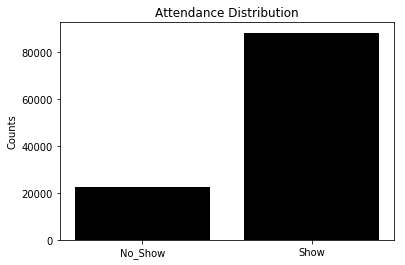

In [26]:
    plt.bar(['Show','No_Show'], df['Attendance'].value_counts(), color ='black')
    plt.title("Attendance Distribution")
    plt.ylabel("Counts");

### It is worth to emphasize here clearly, that in this research we deal with "Attendance" as our boolean variable, so: 
### Attendance = 1 = Show => Attended the appointment
### Attendance = 0 = No Show => Missed the appointment

Therefore, in all the following calculations for mean or median or any study on the "Attendance" column, the higher the value the nearer it is to Attending the appointment, and the lower is the closer to No_Show..

Quick overview of the whole cleaned dataset through histograms:

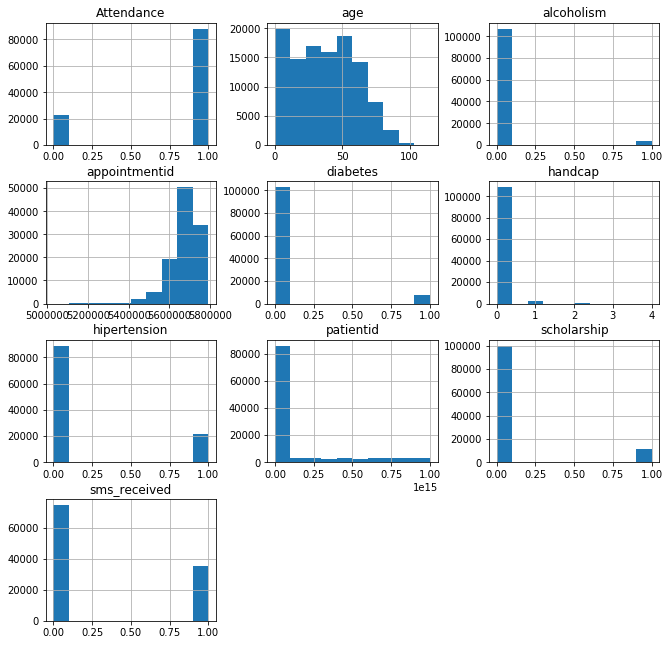

In [27]:
df.hist(figsize = (11, 11));

### Can we make a query of no_show?

In [28]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_show = df.query('Attendance==1') #people who attended
df_noshow = df.query('Attendance==0') #people of no show

In [29]:
df_show.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,Attendance,age_bin
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1,50-75


In [30]:
df_noshow.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,Attendance,age_bin
6,7.336882e+14,5630279,F,2016-04-27 15:05:12+00:00,2016-04-29 00:00:00+00:00,23,GOIABEIRAS,0,0,0,0,0,0,0,0-25


# The Process:

For each column of data, it will be studied from both angles, by calling both functions, so the systematic process will be calling the first then the second function on each column then visualize findings and conclude in comments..

Some columns have special nature so a customized way of EDA was followed when dealing with them..
Let's move through the columns as follows..

# Gender:

## First Procedure:

The distribution of gender of people with no show is as follows: 

F    14594
M     7725
Name: gender, dtype: int64
And here is the visualization of these results : 



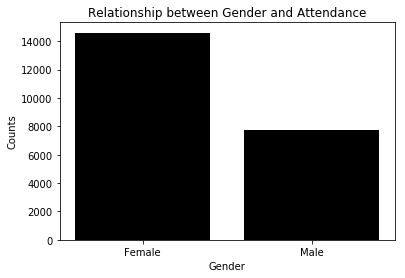

In [31]:
x_labels = ['Female', 'Male'] 
title = "Relationship between Gender and Attendance"
first_procedure(df,'gender',x_labels,title) 

## Second Procedure:

The mean attendace per all categories of gender is as follows: 

gender
F    0.796851
M    0.800321
Name: Attendance, dtype: float64

 
 Here is the visualization of these results : 



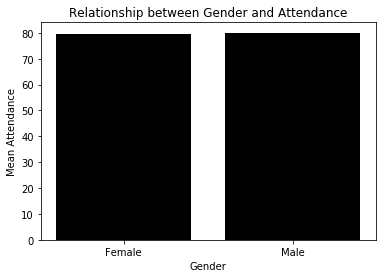

In [32]:
x_labels = ['Female', 'Male'] 
title = "Relationship between Gender and Attendance"
second_procedure(df,'gender',x_labels,title) 

Although women who had no shows were more than men who did so, but on average, both genders skip appointments nearly equally, Equality at its Finest !! 

A limitation here is the huge difference in number of samples that are females than that of men as shown below:

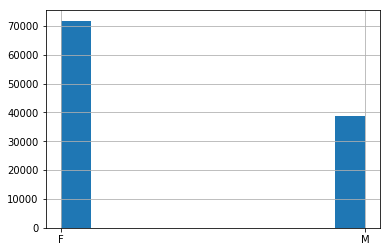

In [33]:
df['gender'].hist();

# Age Groups:

## First Procedure:

The distribution of age_bin of people with no show is as follows: 

0-25       8818
25-50      7774
50-75      4857
75-100      867
100-125       3
Name: age_bin, dtype: int64
And here is the visualization of these results : 



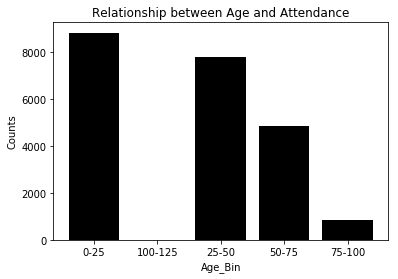

In [34]:
x_labels = ['0-25', '25-50', '50-75', '75-100', '100-125']
title = "Relationship between Age and Attendance"
first_procedure(df,'age_bin' , x_labels, title)

## Second Procedure:

The mean attendace per all categories of age_bin is as follows: 

age_bin
0-25       0.771548
100-125    0.571429
25-50      0.787037
50-75      0.838267
75-100     0.838997
Name: Attendance, dtype: float64

 
 Here is the visualization of these results : 



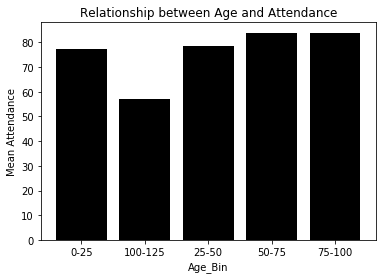

In [35]:
x_labels = ['0-25', '100-125','25-50', '50-75', '75-100']
title = "Relationship between Age and Attendance"
second_procedure(df,'age_bin' , x_labels, title)

People in the age bin are the ones with least attendance rate, they've got a right !!
However, people in the age bin 0-25 are the next in not showing up, this needs explanation !!

# Day of reservation:

Here we will follow a bit different procedure, to know if scheduling the appointment at the day of the appointment affects the attendance:

In [36]:
#Leave to end
df.scheduledday = pd.to_datetime(df['scheduledday']).dt.date
df.appointmentday = pd.to_datetime(df['appointmentday']).dt.date

df_same_day = df.query('scheduledday == appointmentday')
df_prior_day = df.query('scheduledday != appointmentday')

In [37]:
df_same_day.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,Attendance,age_bin
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,1,50-75


In [38]:
df_prior_day.head(1)

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,Attendance,age_bin
5,9.598513e+13,5626772,F,2016-04-27,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,1,75-100


In [39]:
x = df_same_day["Attendance"].mean() 

In [41]:
y = df_prior_day["Attendance"].mean()
#Same day has higher attenddance by far

To visualize the previous findings, here is the mean attendance for people who scheduled appointment on the same day compared to those who scheduled it at prior day: 



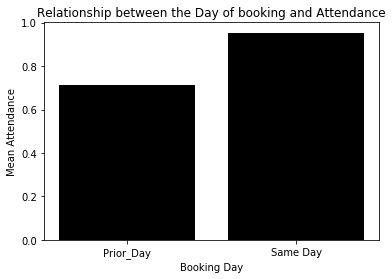

In [42]:
print('To visualize the previous findings, here is the mean attendance for people who scheduled appointment on the same day compared to those who scheduled it at prior day: \n')
plt.bar(['Same Day','Prior_Day'],[x,y],color='black')
plt.title("Relationship between the Day of booking and Attendance")
plt.xlabel('Booking Day')
plt.ylabel('Mean Attendance');


This shows that people who make an instaneous booking (same day) are more likely to show up to the appointment, Logicallll!!

# Scholarship:

## First Procedure:

The distribution of scholarship of people with no show is as follows: 

0    19741
1     2578
Name: scholarship, dtype: int64
And here is the visualization of these results : 



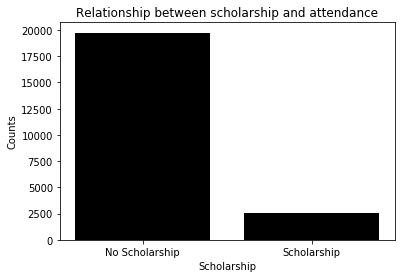

In [43]:
x_labels = ['No Scholarship','Scholarship']
title = "Relationship between scholarship and attendance"
first_procedure(df,'scholarship' , x_labels, title)

## Second Procedure:

The mean attendace per all categories of scholarship is as follows: 

scholarship
0    0.801926
1    0.762637
Name: Attendance, dtype: float64

 
 Here is the visualization of these results : 



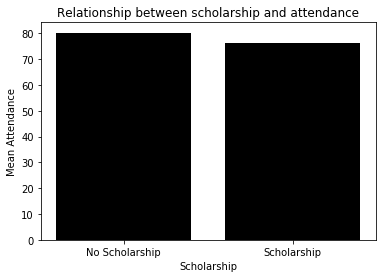

In [44]:
x_labels = ['No Scholarship','Scholarship']
title = "Relationship between scholarship and attendance"
second_procedure(df,'scholarship' , x_labels, title)

It looks like some people do not value what they have got, people enrolled in scholarship are more likely to skip their appointments, SURPRISING !!!

# Hipertension:

## First Procedure:

The distribution of hipertension of people with no show is as follows: 

0    18547
1     3772
Name: hipertension, dtype: int64
And here is the visualization of these results : 



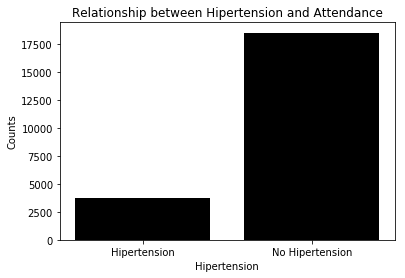

In [45]:
x_labels = ['No Hipertension', 'Hipertension']
title = "Relationship between Hipertension and Attendance"
first_procedure(df,'hipertension' , x_labels, title)

## Second Procedure:

The mean attendace per all categories of hipertension is as follows: 

hipertension
0    0.790961
1    0.826980
Name: Attendance, dtype: float64

 
 Here is the visualization of these results : 



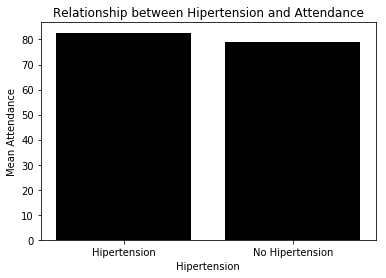

In [46]:
x_labels = ['No Hipertension', 'Hipertension']
title = "Relationship between Hipertension and Attendance"
second_procedure(df,'hipertension' , x_labels, title)

On mean, people with hipertension tend to attend their appointment more than people without it!

# Alcoholism:

## First Procedure:

The distribution of alcoholism of people with no show is as follows: 

0    21642
1      677
Name: alcoholism, dtype: int64
And here is the visualization of these results : 



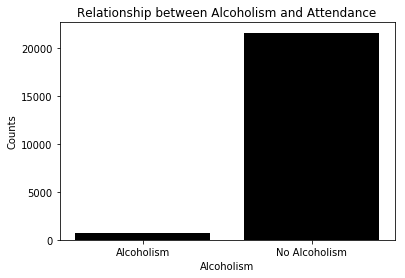

In [47]:
x_labels = ['No Alcoholism', 'Alcoholism']
title = "Relationship between Alcoholism and Attendance"
first_procedure(df,'alcoholism' , x_labels, title)

## Second Procedure:

The mean attendace per all categories of alcoholism is as follows: 

alcoholism
0    0.798052
1    0.798512
Name: Attendance, dtype: float64

 
 Here is the visualization of these results : 



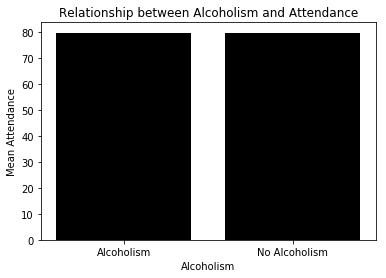

In [48]:
x_labels = ['No Alcoholism', 'Alcoholism']
title = "Relationship between Alcoholism and Attendance"
second_procedure(df,'alcoholism' , x_labels, title)

Although people with alcoholism are the minority among all no_showers, but on mean, people with alcoholism and without have nearly same attendance rate!

# Diabetic ?

## First Procedure:

The distribution of diabetes of people with no show is as follows: 

0    20889
1     1430
Name: diabetes, dtype: int64
And here is the visualization of these results : 



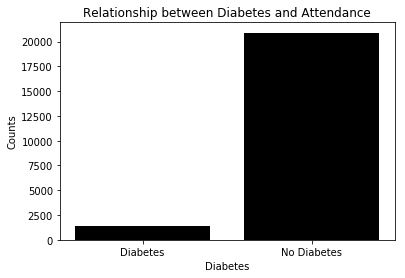

In [49]:
x_labels = ['No Diabetes', 'Diabetes']
title = "Relationship between Diabetes and Attendance"
first_procedure(df,'diabetes' , x_labels, title)

## Second Procedure:

The mean attendace per all categories of diabetes is as follows: 

diabetes
0    0.796370
1    0.819967
Name: Attendance, dtype: float64

 
 Here is the visualization of these results : 



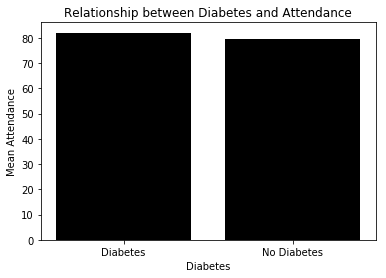

In [50]:
x_labels = ['No Diabetes', 'Diabetes']
title = "Relationship between Diabetes and Attendance"
second_procedure(df,'diabetes' , x_labels, title)

It is nearly equal, but diabetic people even surpass people with no diabetes in discipline in their appointments, Speedy Recovery!!

# Handcap?

## First Procedure:

The distribution of handcap of people with no show is as follows: 

0    21912
1      366
2       37
3        3
4        1
Name: handcap, dtype: int64
And here is the visualization of these results : 



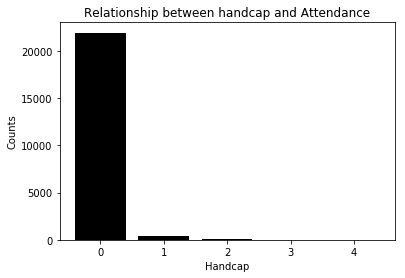

In [51]:
x_labels = ['0', '1', '2', '3', '4']
title = "Relationship between handcap and Attendance"
first_procedure(df,'handcap' , x_labels, title)

## Second Procedure: 

The mean attendace per all categories of handcap is as follows: 

handcap
0    0.797645
1    0.820764
2    0.797814
3    0.769231
4    0.666667
Name: Attendance, dtype: float64

 
 Here is the visualization of these results : 



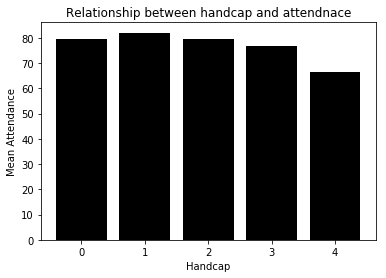

In [52]:
x_labels = ['0', '1', '2', '3', '4']
title = "Relationship between handcap and attendnace"
second_procedure(df,'handcap' , x_labels, title)

On average, people with handcap of degree 4 were the most probable not to show, understandable with regard to the nature of their medical issue, and definetely needs more care!

# Sms_received ?

## First Procedure:

The distribution of sms_received of people with no show is as follows: 

0    12535
1     9784
Name: sms_received, dtype: int64
And here is the visualization of these results : 



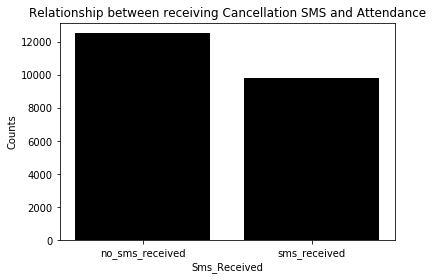

In [53]:
x_labels = ['no_sms_received','sms_received']
title = "Relationship between receiving Cancellation SMS and Attendance"
first_procedure(df,'sms_received' , x_labels, title)

## Second Procedure: 

The mean attendace per all categories of sms_received is as follows: 

sms_received
0    0.832965
1    0.724255
Name: Attendance, dtype: float64

 
 Here is the visualization of these results : 



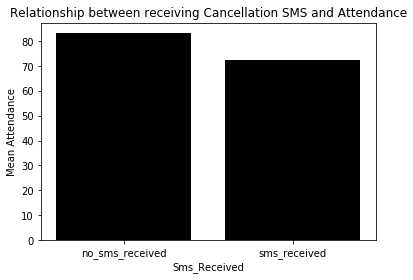

In [54]:
x_labels = ['no_sms_received','sms_received']
title = "Relationship between receiving Cancellation SMS and Attendance"
second_procedure(df,'sms_received' , x_labels, title)

When a SMS was received it was more likely that patients do not show up, so this process needs more study..

# Neighbourhood:

In [55]:
df.loc[df.groupby('neighbourhood').Attendance.idxmin()]

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,Attendance,age_bin
24987,9.598723e+13,5595387,F,2016-04-18,2016-05-05,37,AEROPORTO,0,0,0,0,0,0,0,25-50
216,3.719953e+11,5606885,F,2016-04-20,2016-04-29,29,ANDORINHAS,0,0,0,0,0,1,0,25-50
76,6.549277e+12,5597643,M,2016-04-18,2016-04-29,28,ANTÔNIO HONÓRIO,0,0,0,0,0,0,0,25-50
256,8.599713e+10,5629906,F,2016-04-27,2016-04-29,0,ARIOVALDO FAVALESSA,0,0,0,0,0,0,0,0-25
1363,9.279624e+13,5631486,F,2016-04-28,2016-04-29,34,BARRO VERMELHO,0,0,0,0,0,0,0,25-50
123,3.673278e+13,5621388,F,2016-04-26,2016-04-29,31,BELA VISTA,1,0,0,0,0,1,0,25-50
576,7.382561e+12,5612780,F,2016-04-25,2016-04-29,62,BENTO FERREIRA,0,0,0,0,0,1,0,50-75
4409,6.531269e+13,5635227,F,2016-04-28,2016-05-02,14,BOA VISTA,0,0,0,0,0,1,0,0-25
136,3.428312e+12,5587516,F,2016-04-15,2016-04-29,33,BONFIM,1,0,0,0,0,1,0,25-50
237,5.369588e+12,5623002,F,2016-04-26,2016-04-29,27,CARATOÍRA,1,0,0,0,0,1,0,25-50


In [56]:
df.groupby('neighbourhood')['Attendance'].min()

neighbourhood
AEROPORTO              0
ANDORINHAS             0
ANTÔNIO HONÓRIO        0
ARIOVALDO FAVALESSA    0
BARRO VERMELHO         0
BELA VISTA             0
BENTO FERREIRA         0
BOA VISTA              0
BONFIM                 0
CARATOÍRA              0
CENTRO                 0
COMDUSA                0
CONQUISTA              0
CONSOLAÇÃO             0
CRUZAMENTO             0
DA PENHA               0
DE LOURDES             0
DO CABRAL              0
DO MOSCOSO             0
DO QUADRO              0
ENSEADA DO SUÁ         0
ESTRELINHA             0
FONTE GRANDE           0
FORTE SÃO JOÃO         0
FRADINHOS              0
GOIABEIRAS             0
GRANDE VITÓRIA         0
GURIGICA               0
HORTO                  0
ILHA DAS CAIEIRAS      0
                      ..
PARQUE INDUSTRIAL      1
PARQUE MOSCOSO         0
PIEDADE                0
PONTAL DE CAMBURI      0
PRAIA DO CANTO         0
PRAIA DO SUÁ           0
REDENÇÃO               0
REPÚBLICA              0
RESISTÊNCIA

Among all neighbourhoods, the above scored a mean score of 0 in attendance, which means that the dominant behaviour of patients going to clinics in these areas is not showing up at all.. We should have heads up on these areas!! We used two ways to display them, one explicitly, and one including the 81 rows in the dataframe with other columns.

<a id='conclusions'></a>
## Conclusions

The following findings were obtained based on the previous investigation:
    
    • Reserving on the day of the appointment lead to higher attendance rate
    • Receiving an sms decreases the rate of attendance and increases the no show rate
    • 81 areas (neighborhoods) had shared least attendance rate, which says that a more detailed study on their logistics is to be done to find out the reason behind this
    • Age group (100 - 125) followed by (0-25) and (25-50) were the most age groups with no show incidents, a closer insight on the (0-50) groups needs to take place, as the first one is a bit logical
    • People with serious handcap conditions (degree 4) are likely to skip their appointments, this can also be understood
    • People who scheduled the appointment on its same day are more likely to show up then those who schedule it in earlier days

Notes:

    • Those were the clear findings, as some differences between categories were very slight that we can't tell they really affect attendance (Ex. Alcoholism and Non Alcoholism)
    • The second procedure was more likely to infer conclusions from, due its specific nature studying each group on its own, however the first gave a very clear numerical insights on all groups of data

### Limitations
The following limitations were faced during working on the project:

   
    • We cannot plot columns data against the ‘Attendance’ data in a scatterplot for better visualization due to its boolean nature
    • Equal samples are not taken for each aspect, ex. Not the same number of males and females
    • Explanation was only offered for four columns where the rest were left ambiguous, some were really clear but some needed more explanation
    • The scarcity of some of the categorical samples decreased the reliability of findings (Example: the age group (100-125) included only 3 samples, which made the findings weak ones, as these 3 may be outliers to the original age group on a larger scale  


In [57]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0